# Week 1 Group Projects

This notebook is a template workspace for the week 1 group projects involving
the [Reproducible Brain Charts](https://reprobrainchart.github.io/) (RBC)
database. Herein, we demonstrate how to access the RBC data and demonstrate a
linear regression analysis on the dataset.

## Getting Started with RBC Data

To load in some of the RBC data, we'll use some tools already installed on the
HUB: `rbclib` and `pandas`.
The `rbclib` library allows us to access RBC data from the cloud; it is
demonstrated below.

The `pandas` library handles spreadsheet data (called `DataFrame`s in Python)
and can read tab-separated and comma-separated value files (`*.tsv` and
`*.csv` files).

In [1]:
# We will need the RBCPath type from the rbclib package to load data from the RBC.
from rbclib import RBCPath

# We'll also want to load some data directly from the filesystem.
from pathlib import Path

# We'll want to load/process some of the data using pandas and numpy.
import pandas as pd
import numpy as np

### Accessing the PNC Dataset

The RBC project contains many datasets; for this project, we will focus on
just one of these datasets: the
[Philadelphia Neurodevelopmental Cohort](
https://www.med.upenn.edu/bbl/philadelphianeurodevelopmentalcohort.html)
(PNC). The PNC contains a lot of data, including raw MRI data. However, due to
the time constraints for this project, we suggest that teams focus on the
already processed data provided by the RBC, which is described below.

The RBC's data is stored in a combination of GitHub repositories and Amazon S3
buckets. The RBC GitHub repositories all belong to the organization
[`ReproBrainChart`](https://github.com/ReproBrainChart), and each contains a
subset of the data for one of the RBC datasets; for the PNC dataset, all
repositories names start with `PNC_`:

* `PNC_FreeSurfer`: structural data processed by FreeSurfer.
* `PNC_BIDS`: raw MRI scan data in the
  [Brain Imaging Data Structure](https://bids.neuroimaging.io/index.html)
  format.
* `PNC_CPAC`: processed functional MRI data.

One typically accesses the RBC using the [`datalad`](https://www.datalad.org/)
tool (see the [RBC page on accessing the data](
https://reprobrainchart.github.io/docs/get_data) for more information).
However, we will access the data using the `RBCPath` type that was imported in
the code-cell above (`from rbclib import RBCPath`). This type inherits from a
type called `CloudPath` (from the library [`cloudpathlib`](
https://cloudpathlib.drivendata.org/stable/)); it represents the path of a
file in the RBC dataset and can be used to access data in thecloud as if it
were local.

For example, the following cell creates an `RBCPath` to a subject's FreeSurfer
data directory then lists and prints the contents.

In [2]:
# This path refers to the repo github.com:ReproBrainChart/PNC_FreeSurfer;
# Subject 1000393599's directory is used as an example.
subject_id = 1000393599
# To browse the repo, use this link:
# https://github.com/ReproBrainChart/PNC_FreeSurfer/tree/main
sub_path = RBCPath(f'rbc://PNC_FreeSurfer/freesurfer/sub-{subject_id}')

# This path refers to a directory:
assert sub_path.is_dir()

# Print each file in the directory:
for file in sub_path.iterdir():
    print(repr(file))

RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_brainmeasures.json')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_brainmeasures.tsv')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_freesurfer.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_fsLR_den-164k.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_fsaverage.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_regionsurfacestats.tsv')


If we want to open and load one of these files, we can do so using the
`RBCPath.open` method. This method is like the `Path.open` method (from the
built-in Python library [`pathlib`](1)). For example, if we want to load this
subject's `regionsurfacestats.tsv` file, we can do so as follows.

[1]: https://docs.python.org/3/library/pathlib.html

In [3]:
# We can construct new paths by using the `/` operator. This is identical to
# how paths are constructed in the `pathlib` module.
stats_filepath = sub_path / f'sub-{subject_id}_regionsurfacestats.tsv'

# Use pandas to read in the TSV file then display it:

print(f"Loading {stats_filepath} ...")
with stats_filepath.open('r') as f:
    data = pd.read_csv(f, sep='\t')

data

Loading rbc://PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_regionsurfacestats.tsv ...


,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
0,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalanteriorcingulate,1668,1121,3493,2.870,0.588,...,5.8371,-1.8413,42.8855,44.7269,4.4281,1.9877,0.0777,1.8054,2.1455,0.3402
1,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalmiddlefrontal,3308,2236,7030,2.882,0.537,...,4.6666,7.1531,40.4774,33.3243,5.0341,3.3898,0.2448,2.7003,3.8032,1.1029
2,sub-1000393599,NaN,aparc.DKTatlas,lh,cuneus,4102,2619,5753,2.019,0.490,...,5.2623,-13.1617,33.8137,46.9754,3.0343,3.2453,0.3093,2.4099,3.5491,1.1392
3,sub-1000393599,NaN,aparc.DKTatlas,lh,entorhinal,737,549,2714,3.655,0.585,...,6.0438,2.5989,37.5099,34.9110,3.4560,2.6710,0.1285,2.4654,2.9647,0.4993
4,sub-1000393599,NaN,aparc.DKTatlas,lh,fusiform,4115,2822,8180,2.738,0.526,...,5.2854,-5.9378,39.6908,45.6286,3.9405,2.8272,0.1093,2.3304,3.1105,0.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_3,14937,9936,27688,2.611,0.492,...,5.0774,-10.8846,39.2314,50.1161,4.1769,3.1173,0.3747,2.4544,4.7044,2.2500
13736,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_4,13382,9146,29555,2.909,0.582,...,5.8317,-41.1954,52.2013,93.3967,3.8157,3.5262,0.9928,1.8828,5.1531,3.2703
13737,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_5,10558,7677,31072,3.196,0.792,...,7.1063,-22.2837,88.8118,111.0955,3.3020,2.5300,0.3971,2.0215,4.7753,2.7538
13738,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_6,20144,13602,41999,2.696,0.641,...,6.0781,-11.6287,43.5814,55.2101,3.6592,3.0563,0.5547,1.8599,4.9149,3.0550


### Getting the Participant Lists and Metadata

We have pre-sorted the participants in the PNC study into a training and a
test dataset. Basic metadata about each participant can be found in TSV files
in the `shared` directory in your home directory.

In [3]:
# Participant meta-data is generally located in the BIDS repository for each
# study:
rbcdata_path = Path('/home/jovyan/shared/data/RBC')
train_filepath = rbcdata_path / 'train_participants.tsv'
test_filepath = rbcdata_path / 'test_participants.tsv'

# Load the PNC participants TSV files...
with train_filepath.open('r') as f:
    train_data = pd.read_csv(f, sep='\t')
with test_filepath.open('r') as f:
    test_data = pd.read_csv(f, sep='\t')

# We can also concatenate the two datasets into a single dataset of all
# study participants:
all_data = pd.concat([train_data, test_data])

# Display the full dataframe:
all_data

,participant_id,study,study_site,session_id,wave,age,sex,race,ethnicity,bmi,handedness,participant_education,parent_1_education,parent_2_education,p_factor,internalizing_mcelroy_harmonized_all_samples,externalizing_mcelroy_harmonized_all_samples,attention_mcelroy_harmonized_all_samples,cubids_acquisition_group
0,1000393599,PNC,PNC1,PNC1,1,15.583333,Male,Black,not Hispanic or Latino,22.15,Right,9th Grade,Complete primary,Complete secondary,0.589907,-0.449373,-0.630780,-1.842178,1
1,1001970838,PNC,PNC1,PNC1,1,17.833333,Male,Other,Hispanic or Latino,23.98,Right,11th Grade,Complete tertiary,Complete tertiary,-0.659061,0.531072,0.392751,0.190706,1
2,1007995238,PNC,PNC1,PNC1,1,13.750000,Female,Other,not Hispanic or Latino,23.77,Right,6th Grade,Complete tertiary,Complete primary,-1.608375,-0.744118,-0.314187,-0.432662,1
3,1011497669,PNC,PNC1,PNC1,1,16.666667,Male,White,not Hispanic or Latino,29.68,Right,9th Grade,Complete tertiary,Complete tertiary,-1.233807,-0.896835,-0.449099,0.111167,1
4,1017092387,PNC,PNC1,PNC1,1,18.666667,Female,Black,not Hispanic or Latino,23.24,Right,11th Grade,Complete primary,Complete primary,-0.923100,-0.313455,2.204168,-0.782266,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,969649154,PNC,PNC1,PNC1,1,12.333333,Male,White,not Hispanic or Latino,17.38,Right,5th Grade,Complete tertiary,Complete secondary,NaN,-0.148520,0.556444,0.024228,1
530,970890500,PNC,PNC1,PNC1,1,18.166667,Female,White,not Hispanic or Latino,30.89,Right,11th Grade,Complete secondary,Complete secondary,NaN,0.993806,1.578177,-0.373470,1
531,975856179,PNC,PNC1,PNC1,1,11.000000,Male,White,not Hispanic or Latino,15.67,Right,4th Grade,Complete primary,Complete secondary,NaN,-1.026645,-0.582212,1.333857,1
532,984757368,PNC,PNC1,PNC1,1,13.416667,Male,Black,not Hispanic or Latino,16.66,Right,5th Grade,Complete primary,NaN,NaN,0.360029,-0.515655,1.509584,114


In [6]:
test_data.shape

(534, 19)

## Project Goal: Predict the `p_factor`

The RBC datasets include a variable for each subject called the `p_factor`.
This factor is intended to capture overall psychopathology and is discussed at
length in RBC publications. The goal for this project is to train a
machine-learning tool to predict the `p_factor` of each participant in the
test dataset by using data from the participants in the training dataset.
Note that the `p_factor` column in the training dataset is provided, but the
`p_factor` column in the test dataset has been set to `NaN`.

Your specific task is to calculate predicted `p_factor` values, to insert
these values into the `'p_factor'` column of the provided `test_data`
dataframe, to save `test_data` to disk using the `test_data.to_csv` method
(example below), then finally to commit and push the file to your group's
GitHub repository.

We will look over the results of the group mini-projects together once
everyone has submitted their predictions.

**In this section, we demonstrate an example approach to predicting the
`p_factor` using one of the most straightforward supervised techniques in
machine learning: linear regression.** Suppose we suspected that the size of
Brodmann Area 1 was predictive of the `p_factor` in individual participants
and thus wanted to run a linear regression analysis to predict `p_factor` in
the test participants based on the relationship in the training participants.
Performing linear regression will require a few steps, which are likely to be
similar in your projects:

1. Collect the relevant data (the surface areas of BA1) into a dataframe.
2. Train the linear regression model using the training participants.
3. Use the trained model to predict the `p_factor` of the test subjects.
4. Export and commit our predictions.

### Step 1. Collect Data

The data we need to make the predictions are, for each participant, (1) the
surface area of BA1, and (2) the `p_factor`. We can collect these into a
dataframe using `pandas` and the `RBCPath` type (to load the data).

The surface area of BA1 can be found in the FreeSurfer TSV files examined
earlier in this notebook. We'll start by writing a function that loads the
appropriate TSV for for a given participant.

In order to speed up the loading of data during the project, we can specify
a `local_cache_dir` where any data downloaded using the function will be
automatically saved; the next time you load the same data, it will be loaded
from local storage instead of from S3 (local storage is much faster). The
function here uses the directory `cache` in your home directory by default,
but you can change this if you prefer a different directory. The directory
will be automatically created for you if it does not exist.

In [6]:
def load_fsdata(participant_id, local_cache_dir=(Path.home() / 'cache')):
    "Loads and returns the dataframe of a PNC participant's FreeSurfer data."

    # Check that the local_cache_dir exists and make it if it doesn't.
    if local_cache_dir is not None:
        local_cache_dir = Path(local_cache_dir)
        local_cache_dir.mkdir(exist_ok=True)
    
    # Make the RBCPath and find the appropriate file:
    pnc_freesurfer_path = RBCPath(
        'rbc://PNC_FreeSurfer/freesurfer',
        # We provide the local_cache_dir to the RBCPath object; all paths made
        # from this object will use the same cache directory.
        local_cache_dir=local_cache_dir)
    participant_path = pnc_freesurfer_path / f'sub-{participant_id}'
    tsv_path = participant_path / f'sub-{participant_id}_regionsurfacestats.tsv'

    # Use pandas to read in the TSV file:
    with tsv_path.open('r') as f:
        data = pd.read_csv(f, sep='\t')

    # Return the loaded data:
    return data

We can run this function to obtain a subject's FreeSurfer dataframe. This
dataframe contains information about various anatomical atlases that segment
the cortical surface into distinct regions. Notice that the `atlas` column of
the dataframe contains the name of distinct atlases while the `StructName`
column contains the name of the ROI described. The `SurfArea` column gives the
surface area of each ROI.

In [7]:
example_participant_id = 1000393599
data = load_fsdata(example_participant_id)

# Display the dataframe we loaded:
data

,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
0,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalanteriorcingulate,1668,1121,3493,2.870,0.588,...,5.8371,-1.8413,42.8855,44.7269,4.4281,1.9877,0.0777,1.8054,2.1455,0.3402
1,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalmiddlefrontal,3308,2236,7030,2.882,0.537,...,4.6666,7.1531,40.4774,33.3243,5.0341,3.3898,0.2448,2.7003,3.8032,1.1029
2,sub-1000393599,NaN,aparc.DKTatlas,lh,cuneus,4102,2619,5753,2.019,0.490,...,5.2623,-13.1617,33.8137,46.9754,3.0343,3.2453,0.3093,2.4099,3.5491,1.1392
3,sub-1000393599,NaN,aparc.DKTatlas,lh,entorhinal,737,549,2714,3.655,0.585,...,6.0438,2.5989,37.5099,34.9110,3.4560,2.6710,0.1285,2.4654,2.9647,0.4993
4,sub-1000393599,NaN,aparc.DKTatlas,lh,fusiform,4115,2822,8180,2.738,0.526,...,5.2854,-5.9378,39.6908,45.6286,3.9405,2.8272,0.1093,2.3304,3.1105,0.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_3,14937,9936,27688,2.611,0.492,...,5.0774,-10.8846,39.2314,50.1161,4.1769,3.1173,0.3747,2.4544,4.7044,2.2500
13736,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_4,13382,9146,29555,2.909,0.582,...,5.8317,-41.1954,52.2013,93.3967,3.8157,3.5262,0.9928,1.8828,5.1531,3.2703
13737,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_5,10558,7677,31072,3.196,0.792,...,7.1063,-22.2837,88.8118,111.0955,3.3020,2.5300,0.3971,2.0215,4.7753,2.7538
13738,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_6,20144,13602,41999,2.696,0.641,...,6.0781,-11.6287,43.5814,55.2101,3.6592,3.0563,0.5547,1.8599,4.9149,3.0550


In [8]:
data['atlas'].unique() ## a wide variety of brain atlases

array(['aparc.DKTatlas', 'aparc.a2009s', 'aparc', 'BA_exvivo', 'AAL',
       'CC200', 'CC400', 'glasser', 'gordon333dil', 'HOCPATh25',
       'Juelich', 'PALS_B12_Brodmann',
       'Schaefer2018_1000Parcels_17Networks_order',
       'Schaefer2018_1000Parcels_7Networks_order',
       'Schaefer2018_100Parcels_17Networks_order',
       'Schaefer2018_100Parcels_7Networks_order',
       'Schaefer2018_200Parcels_17Networks_order',
       'Schaefer2018_200Parcels_7Networks_order',
       'Schaefer2018_300Parcels_17Networks_order',
       'Schaefer2018_300Parcels_7Networks_order',
       'Schaefer2018_400Parcels_17Networks_order',
       'Schaefer2018_400Parcels_7Networks_order',
       'Schaefer2018_500Parcels_17Networks_order',
       'Schaefer2018_500Parcels_7Networks_order',
       'Schaefer2018_600Parcels_17Networks_order',
       'Schaefer2018_600Parcels_7Networks_order',
       'Schaefer2018_700Parcels_17Networks_order',
       'Schaefer2018_700Parcels_7Networks_order',
       'Schaefer

In [10]:
data[data['atlas'] == 'Schaefer2018_200Parcels_7Networks_order'][['StructName', 'Index','SegId']]

,StructName,Index,SegId
4365,Background+FreeSurfer_Defined_Medial_Wall,1,0
4366,7Networks_LH_Vis_1,2,1
4367,7Networks_LH_Vis_2,3,2
4368,7Networks_LH_Vis_3,4,3
4369,7Networks_LH_Vis_4,5,4
...,...,...,...
4562,7Networks_RH_Default_PFCdPFCm_6,97,96
4563,7Networks_RH_Default_PFCdPFCm_7,98,97
4564,7Networks_RH_Default_pCunPCC_1,99,98
4565,7Networks_RH_Default_pCunPCC_2,100,99


In [20]:
data[data['atlas'] == 'Schaefer2018_200Parcels_7Networks_order'][['StructName', 'Index','SegId']]


,StructName,Index,SegId
4365,Background+FreeSurfer_Defined_Medial_Wall,1,0
4366,7Networks_LH_Vis_1,2,1
4367,7Networks_LH_Vis_2,3,2
4368,7Networks_LH_Vis_3,4,3
4369,7Networks_LH_Vis_4,5,4
...,...,...,...
4562,7Networks_RH_Default_PFCdPFCm_6,97,96
4563,7Networks_RH_Default_PFCdPFCm_7,98,97
4564,7Networks_RH_Default_pCunPCC_1,99,98
4565,7Networks_RH_Default_pCunPCC_2,100,99


In [19]:
a = data[data['atlas'] == 'Schaefer2018_200Parcels_7Networks_order'][['subject_id','hemisphere','StructName','Index','SurfArea', 'GrayVol', 'ThickAvg', 'ThickStd', 'MeanCurv','GausCurv', 'FoldInd', 'CurvInd','Mean_wgpct','Mean_piallgi']]
a 

,subject_id,hemisphere,StructName,Index,SurfArea,GrayVol,ThickAvg,ThickStd,MeanCurv,GausCurv,FoldInd,CurvInd,Mean_wgpct,Mean_piallgi
4365,sub-1000393599,lh,Background+FreeSurfer_Defined_Medial_Wall,1,6146,2370,0.847,1.266,0.089,0.028,85,9.9,3.8815,2.4985
4366,sub-1000393599,lh,7Networks_LH_Vis_1,2,770,2070,2.604,0.600,0.129,0.024,14,1.1,19.3572,2.8928
4367,sub-1000393599,lh,7Networks_LH_Vis_2,3,1809,4249,2.253,0.664,0.146,0.042,39,4.6,17.7515,2.7260
4368,sub-1000393599,lh,7Networks_LH_Vis_3,4,1113,3052,2.478,0.478,0.138,0.032,29,2.2,20.4611,3.0195
4369,sub-1000393599,lh,7Networks_LH_Vis_4,5,908,1970,2.093,0.621,0.153,0.051,22,2.8,13.6236,3.0700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4562,sub-1000393599,rh,7Networks_RH_Default_PFCdPFCm_6,97,948,2731,2.759,0.438,0.128,0.028,16,1.5,25.8554,2.9693
4563,sub-1000393599,rh,7Networks_RH_Default_PFCdPFCm_7,98,495,1560,2.819,0.513,0.128,0.022,7,0.7,26.4105,2.7804
4564,sub-1000393599,rh,7Networks_RH_Default_pCunPCC_1,99,830,2482,2.901,0.441,0.143,0.037,20,2.0,20.2993,3.4720
4565,sub-1000393599,rh,7Networks_RH_Default_pCunPCC_2,100,1484,4926,2.846,0.562,0.144,0.034,35,3.4,21.3793,3.1781


In [22]:
a = a[a['Index'] != 1]
a.shape

(200, 14)

In [85]:
def flatten_with_region_labels(df):
    # Keep the subject ID
    subj_id = df['subject_id'].iloc[0]

    # Features to rename (everything except these)
    exclude = {'subject_id', 'hemisphere', 'Index'}
    feature_cols = [col for col in df.columns if col not in exclude]

    flat_data = {}
    flat_data['subject_id'] = subj_id
    for _, row in df.iterrows():
        hemi = row['hemisphere']
        idx = str(row['Index'])
        for feat in feature_cols:
            new_col = f"{feat}_{hemi}_{idx}"
            flat_data[new_col] = row[feat]

    return pd.DataFrame([flat_data])

In [88]:
flatten_with_region_labels(a)

,subject_id,SurfArea_lh_2,GrayVol_lh_2,ThickAvg_lh_2,ThickStd_lh_2,MeanCurv_lh_2,GausCurv_lh_2,FoldInd_lh_2,CurvInd_lh_2,Mean_wgpct_lh_2,...,SurfArea_rh_101,GrayVol_rh_101,ThickAvg_rh_101,ThickStd_rh_101,MeanCurv_rh_101,GausCurv_rh_101,FoldInd_rh_101,CurvInd_rh_101,Mean_wgpct_rh_101,Mean_piallgi_rh_101
0,sub-1000393599,770,2070,2.604,0.6,0.129,0.024,14,1.1,19.3572,...,688,2060,2.458,0.513,0.142,0.029,15,1.2,20.6351,2.9065


In [28]:
data.columns

Index(['subject_id', 'session_id', 'atlas', 'hemisphere', 'StructName',
       'NumVert', 'SurfArea', 'GrayVol', 'ThickAvg', 'ThickStd', 'MeanCurv',
       'GausCurv', 'FoldInd', 'CurvInd', 'Index', 'SegId', 'Mean_wgpct',
       'StdDev_wgpct', 'Min_wgpct', 'Max_wgpct', 'Range_wgpct', 'SNR_wgpct',
       'Mean_piallgi', 'StdDev_piallgi', 'Min_piallgi', 'Max_piallgi',
       'Range_piallgi'],
      dtype='object')

To extract the surface area of BA1, we need to look for rows whose
`StructName` indicates that it represents BA1. In the RBC database, the name
`'Brodmann.1'` is used to represent Brodmann Area 1. We can select only the
rows of interest using this name.

In [13]:
row_mask = (data['StructName'] == 'Brodmann.1')
data[row_mask]

,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
1876,sub-1000393599,NaN,PALS_B12_Brodmann,lh,Brodmann.1,2851,1753,4067,2.069,0.576,...,5.2783,-7.2181,32.3884,39.6064,3.0996,3.4915,0.6993,2.4164,5.3746,2.9581
1919,sub-1000393599,NaN,PALS_B12_Brodmann,rh,Brodmann.1,2379,1537,3766,2.008,0.586,...,4.8646,-6.7201,38.8376,45.5577,3.3062,3.2389,0.5011,2.4060,4.8009,2.3949


Given these rows, we can extract the BA1 surface areas and sum them (we will
perform the linear regression on the bilateral BA1 surface area by adding the
left and right hemisphere surface areas).

In [14]:
ba1_surfareas = data.loc[row_mask, 'SurfArea']
ba1_surfarea = sum(ba1_surfareas)

# Show the bilateral surface area for this participant (in square mm):
ba1_surfarea

3290

Based on the above workflow, we can now write a function that extracts the BA1
surface area for a participant.

In [15]:
def load_ba1_surfarea(participant_id):
    """Loads and returns the bilateral Brodmann Area 1 surface area for a PNC
    study participant.
    """
    # First, load the subject's FreeSurfer dataframe:
    data = load_fsdata(participant_id)
    # Next, find the relevant rows:
    row_mask = (data['StructName'] == 'Brodmann.1')
    # Then extract and sum the surface areas:
    ba1_surfareas = data.loc[row_mask, 'SurfArea']
    ba1_surfarea = sum(ba1_surfareas)
    # And return this value:
    return ba1_surfarea

Let's test this function:

In [16]:
load_ba1_surfarea(example_participant_id)

3290

Now that we have code written to extract data from a single subject, we can
gather the BA1 data for our training and test subjects into a single
dataframe. Doing so will require downloading all of the TSV files for all of
the subjects in the training dataset. This will take some time, but probably
less than an hour.

In [17]:
# First load in surface area data for each participant:
print("Loading surface areas...")     

# We will put the rows in this dictionary of lists as we build the dataframe:
all_vars = {
    'participant_id': [],
    'ba1_surface_area': [],
    'p_factor': []}

# We'll display a progress bar `prog` as we go also:
from ipywidgets import IntProgress
prog = IntProgress(min=0, max=len(all_data))
display(prog)

# Okay, loop through each row of the `all_data` dataframe, which contains both
# training and test subjects, load their BA1 data, and store it in the
# all_vars dictionary.
for (ii, row) in all_data.iterrows():
    # Extract the participant ID and p_factor (which will be NaN for test
    # participants).
    participant_id = row['participant_id']
    p_factor = row['p_factor']
    # Load the surface area for this participant:
    try:
        surf_area = load_ba1_surfarea(participant_id)
    except FileNotFoundError:
        # Some subjects are just missing the file, so we code them as NaN.
        surf_area = np.nan
    # Append the participant ID and their surface area to our dataset:
    all_vars['participant_id'].append(participant_id)
    all_vars['ba1_surface_area'].append(surf_area)
    all_vars['p_factor'].append(p_factor)
    # Increment the progress bar counter:
    prog.value += 1

# Convert train_vars into a dataframe.
all_vars = pd.DataFrame(all_vars)

# Extract the training and test subjects into separate dataframes; the test
# participants can be identified as those having NaN values for their
# p_factor column.
train_vars = all_vars[~np.isnan(all_vars['p_factor'])]
test_vars = all_vars[np.isnan(all_vars['p_factor'])]

# Display the finished dataframe.
all_vars

Loading surface areas...


IntProgress(value=0, max=1601)

,participant_id,ba1_surface_area,p_factor
0,1000393599,3290.0,0.589907
1,1001970838,2629.0,-0.659061
2,1007995238,2921.0,-1.608375
3,1011497669,3184.0,-1.233807
4,1017092387,2973.0,-0.923100
...,...,...,...
1596,969649154,3086.0,NaN
1597,970890500,2235.0,NaN
1598,975856179,2863.0,NaN
1599,984757368,2877.0,NaN


### Step 2. Train the Linear Regression

To train and perform the linear regression analysis, we will use the
[`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
type from scikit-learn.

In [18]:
# Import the LinearRegression type:
from sklearn.linear_model import LinearRegression

# LinearRegression requires a matrix whose columns are the variables and whose
# final column is the value being predicted (the p_factor for us). We can
# extract these columns straight from the dataframes we generated.
train_matrix = train_vars.loc[:, ['ba1_surface_area', 'p_factor']].values
# We need to exclude rows with NaNs for training:
train_okrows = np.all(~np.isnan(train_matrix), axis=1)
train_matrix = train_matrix[train_okrows]

# Train the regression using the training matrix:
lreg = LinearRegression()
lreg.fit(train_matrix[:, :1], train_matrix[:, 1])

# Display the trained regression parameters:
print("Linear Regression:")
print("  Intercept:", lreg.intercept_)
print("  Slope:", lreg.coef_)

Linear Regression:
  Intercept: 0.42976633990916446
  Slope: [-0.0003118]


### Step 3. Predict the `p_factor` of the Test Data

In [23]:
# We can apply the trained linear regression object `lreg` to the 1-column
# matrix of ba1_surface_area values in the test_vars dataframe.
test_matrix = test_vars.loc[:, ['ba1_surface_area']].values
test_okrows = np.all(~np.isnan(test_matrix), axis=1)
test_matrix = test_matrix[test_okrows]

# Apply the model:
p_factor_predictions = lreg.predict(test_matrix)

# Display the predictions:
p_factor_predictions

array([-0.42986345, -0.41645609, -0.30982084, -0.66620708, -0.2929837 ,
       -0.3849644 , -0.37685762, -0.39587736, -0.49066425, -0.47039732,
       -0.48380467, -0.48162208, -0.54522907, -0.52122055, -0.42830445,
       -0.29672528, -0.52090875, -0.5673668 , -0.45948435, -0.4454534 ,
       -0.48505187, -0.37872842, -0.24122507, -0.43797022, -0.44015282,
       -0.38091101, -0.55614204, -0.34380693, -0.40523133, -0.46634393,
       -0.40897292, -0.31917481, -0.39431837, -0.60540628, -0.3846526 ,
       -0.52963912, -0.48286928, -0.5364987 , -0.40304874, -0.55770103,
       -0.65591771, -0.37405143, -0.44950679, -0.37623402, -0.29828428,
       -0.26367459, -0.48318108, -0.36407386, -0.51747896, -0.49752383,
       -0.42861625, -0.48567547, -0.45013038, -0.46852652, -0.50313621,
       -0.32011021, -0.4142735 , -0.44202361, -0.35690249, -0.55551844,
       -0.56892579, -0.62130802, -0.59480511, -0.5053188 , -0.38153461,
       -0.49347044, -0.60914786, -0.46416134, -0.32042201, -0.51

### Step 4. Save and Commit the Results

To save and commit the results, we first need to save the predicted `p_factor`
data into the test dataframe (where there are currently NaNs). In the cell
above, we calculated the variable `test_okrows` that indicates which rows
of the `test_vars`, `test_matrix`, and `test_data` objects were predicted
(those that weren't predicted were excluded due to missing surface area data
in our case).

We can use this to insert the predicted `p_factor` data into `test_data`.

In [24]:
test_data.loc[test_okrows, 'p_factor'] = p_factor_predictions

# Display the resulting test data:
test_data

,participant_id,study,study_site,session_id,wave,age,sex,race,ethnicity,bmi,handedness,participant_education,parent_1_education,parent_2_education,p_factor,internalizing_mcelroy_harmonized_all_samples,externalizing_mcelroy_harmonized_all_samples,attention_mcelroy_harmonized_all_samples,cubids_acquisition_group
0,1000881804,PNC,PNC1,PNC1,1,14.916667,Male,Black,not Hispanic or Latino,21.52,Right,7th Grade,Complete secondary,Complete secondary,-0.429863,0.097355,0.387355,-0.467807,113
1,100527940,PNC,PNC1,PNC1,1,8.250000,Male,Black,not Hispanic or Latino,NaN,Ambidextrous,1st Grade,Complete secondary,Complete primary,-0.416456,0.699062,-0.781881,-0.982040,3
2,1006151876,PNC,PNC1,PNC1,1,21.500000,Female,Other,not Hispanic or Latino,NaN,Right,12th Grade,Complete tertiary,Complete secondary,-0.309821,0.495947,0.806481,-0.832210,1
3,1012530688,PNC,PNC1,PNC1,1,8.750000,Male,Black,not Hispanic or Latino,21.36,Right,2nd Grade,Complete tertiary,Complete secondary,-0.666207,-0.334835,1.277773,0.161110,4
4,1030193285,PNC,PNC1,PNC1,1,18.000000,Male,White,not Hispanic or Latino,22.15,Right,10th Grade,Complete secondary,Complete primary,-0.292984,1.027404,-0.490472,2.014568,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,969649154,PNC,PNC1,PNC1,1,12.333333,Male,White,not Hispanic or Latino,17.38,Right,5th Grade,Complete tertiary,Complete secondary,-0.532445,-0.148520,0.556444,0.024228,1
530,970890500,PNC,PNC1,PNC1,1,18.166667,Female,White,not Hispanic or Latino,30.89,Right,11th Grade,Complete secondary,Complete secondary,-0.267104,0.993806,1.578177,-0.373470,1
531,975856179,PNC,PNC1,PNC1,1,11.000000,Male,White,not Hispanic or Latino,15.67,Right,4th Grade,Complete primary,Complete secondary,-0.462914,-1.026645,-0.582212,1.333857,1
532,984757368,PNC,PNC1,PNC1,1,13.416667,Male,Black,not Hispanic or Latino,16.66,Right,5th Grade,Complete primary,NaN,-0.467279,0.360029,-0.515655,1.509584,114


We now need to save the data to disk. We want to put this in the `results`
directory of the repository.

In [ ]:
# The sep='\t' option here is necessary for tab-separated-value (as opposed to
# comma-separated-value) files. The `index=False` just indicates that pandas
# doesn't need to write out its own index column.

group_name = 'example'  # Change this to be your group name!

test_data.to_csv(f'results/{group_name}.tsv', sep='\t', index=False)

Once the tsv file has been saved, you can commit it to your GitHub repository
then push it and submit a pull request to the `results` branch of the original
repository!

### Since a wide variety of brain atlases were included, a random atlas would be picked below: 'Schaefer2018_200Parcels_7Networks_order'

### Data Organization

In [6]:
def flatten_with_region_labels(df):
    # Keep the subject ID
    subj_id = df['subject_id'].iloc[0]

    # Features to rename (everything except these)
    exclude = {'subject_id', 'hemisphere', 'Index'}
    feature_cols = [col for col in df.columns if col not in exclude]

    flat_data = {}
    flat_data['subject_id'] = subj_id
    for _, row in df.iterrows():
        hemi = row['hemisphere']
        idx = str(row['Index'])
        for feat in feature_cols:
            new_col = f"{feat}_{hemi}_{idx}"
            flat_data[new_col] = row[feat]

    return pd.DataFrame([flat_data])

In [7]:
def load_surfarea(participant_id):
    """Loads and returns the bilateral Brodmann Area 1 surface area for a PNC
    study participant.
    """
    # First, load the subject's FreeSurfer dataframe:
    data = load_fsdata(participant_id)
    # Next, find the relevant rows:
    row_mask = (data[data['atlas'] == 'Schaefer2018_200Parcels_7Networks_order'][['subject_id','hemisphere','Index','SurfArea', 'GrayVol', 'ThickAvg', 'ThickStd', 'MeanCurv','GausCurv', 'FoldInd', 'CurvInd','Mean_wgpct','Mean_piallgi']])
    row_mask = row_mask[row_mask['Index'] != 1] ## remove Background+FreeSurfer_Defined_Medial_Wall
    # Then extract and sum the surface areas:
    surfareas = flatten_with_region_labels(row_mask)
    # And return this value:
    return surfareas

In [8]:
# First load in surface area data for each participant:
print("Loading surface areas...")     

# We will put the rows in this dictionary of lists as we build the dataframe:
# all_vars = {
#     'participant_id': [],
#     'ba1_surface_area': [],
#     'p_factor': []}

# We'll display a progress bar `prog` as we go also:
from ipywidgets import IntProgress
prog = IntProgress(min=0, max=len(all_data))
display(prog)
data_train_test_200 = pd.DataFrame()

# Okay, loop through each row of the `all_data` dataframe, which contains both
# training and test subjects, load their BA1 data, and store it in the
# all_vars dictionary.
for (ii, row) in all_data.iterrows():
    # Extract the participant ID and p_factor (which will be NaN for test
    # participants).
    participant_id = row['participant_id']
    p_factor = row['p_factor']
    age = row['age']
    sex = row['sex']
    bmi = row['bmi']

    # Load the surface area for this participant:
    try:
        surf_area = load_surfarea(participant_id)
    except FileNotFoundError:
        # Some subjects are just missing the file, so we code them as NaN. ## we skip them here
        # surf_area = np.nan
        print(f"Skipping {participant_id}: file not found.")
        continue
    # Append the participant ID and their surface area to our dataset:
    # all_vars['participant_id'].append(participant_id)
    # all_vars['ba1_surface_area'].append(surf_area)
    # all_vars['p_factor'].append(p_factor)
    surf_area['p_factor'] = p_factor
    ## add some relevent demographic variables
    surf_area['age'] = age
    surf_area['sex'] = sex
    surf_area['bmi'] = bmi

    data_train_test_200 = pd.concat([data_train_test_200, surf_area], ignore_index=True)

    # Increment the progress bar counter:
    prog.value += 1

# Convert train_vars into a dataframe.
# all_vars = pd.DataFrame(all_vars)

# Extract the training and test subjects into separate dataframes; the test
# participants can be identified as those having NaN values for their
# p_factor column.
train_vars = data_train_test_200[~np.isnan(data_train_test_200['p_factor'])]
test_vars = data_train_test_200[np.isnan(data_train_test_200['p_factor'])]

# Display the finished dataframe.
data_train_test_200

Loading surface areas...


IntProgress(value=0, max=1601)

Skipping 1342487188: file not found.
Skipping 1649551035: file not found.
Skipping 2003542642: file not found.
Skipping 219325366: file not found.
Skipping 2249226316: file not found.
Skipping 4184549693: file not found.
Skipping 495793681: file not found.
Skipping 4205323727: file not found.
Skipping 533698126: file not found.


,subject_id,SurfArea_lh_2,GrayVol_lh_2,ThickAvg_lh_2,ThickStd_lh_2,MeanCurv_lh_2,GausCurv_lh_2,FoldInd_lh_2,CurvInd_lh_2,Mean_wgpct_lh_2,...,MeanCurv_rh_101,GausCurv_rh_101,FoldInd_rh_101,CurvInd_rh_101,Mean_wgpct_rh_101,Mean_piallgi_rh_101,p_factor,age,sex,bmi
0,sub-1000393599,770,2070,2.604,0.600,0.129,0.024,14,1.1,19.3572,...,0.142,0.029,15,1.2,20.6351,2.9065,0.589907,15.583333,Male,22.15
1,sub-1001970838,869,2085,2.210,0.459,0.126,0.034,20,1.6,18.7546,...,0.144,0.033,15,1.2,22.3422,3.0894,-0.659061,17.833333,Male,23.98
2,sub-1007995238,795,2252,2.787,0.508,0.104,0.021,15,1.0,21.3145,...,0.138,0.032,18,1.3,22.1665,3.1822,-1.608375,13.750000,Female,23.77
3,sub-1011497669,848,2420,2.687,0.452,0.116,0.024,13,1.2,20.6882,...,0.149,0.036,20,1.9,20.1634,3.1197,-1.233807,16.666667,Male,29.68
4,sub-1017092387,830,2360,2.625,0.408,0.139,0.030,20,1.5,21.2375,...,0.153,0.038,20,1.5,20.3935,2.9595,-0.923100,18.666667,Female,23.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,sub-969649154,922,2573,2.612,0.469,0.110,0.019,15,0.9,21.4848,...,0.121,0.027,13,1.1,22.6886,3.0705,NaN,12.333333,Male,17.38
1588,sub-970890500,806,2108,2.512,0.575,0.117,0.031,17,1.4,18.2542,...,0.155,0.040,15,1.2,20.9895,NaN,NaN,18.166667,Female,30.89
1589,sub-975856179,920,2090,2.243,0.579,0.115,0.025,15,1.2,19.7019,...,0.123,0.030,11,1.5,22.2611,3.5189,NaN,11.000000,Male,15.67
1590,sub-984757368,714,2007,2.655,0.514,0.125,0.034,17,1.2,20.5598,...,0.142,0.041,13,1.3,22.1398,3.1303,NaN,13.416667,Male,16.66


In [9]:
surf_area.shape

(1, 2005)

In [20]:
data_train_test_200.to_csv(f'results/data_train_test_200.tsv', sep='\t', index=False) ## save the training and test data

In [137]:
data_train_test_200_saved = pd.read_csv(f'results/data_train_test_200.tsv', sep='\t')

In [19]:
data_train_test_200_saved

,subject_id,SurfArea_lh_2,GrayVol_lh_2,ThickAvg_lh_2,ThickStd_lh_2,MeanCurv_lh_2,GausCurv_lh_2,FoldInd_lh_2,CurvInd_lh_2,Mean_wgpct_lh_2,...,MeanCurv_rh_101,GausCurv_rh_101,FoldInd_rh_101,CurvInd_rh_101,Mean_wgpct_rh_101,Mean_piallgi_rh_101,p_factor,age,sex,bmi
0,sub-1000393599,770,2070,2.604,0.600,0.129,0.024,14,1.1,19.3572,...,0.142,0.029,15,1.2,20.6351,2.9065,0.589907,15.583333,Male,22.15
1,sub-1001970838,869,2085,2.210,0.459,0.126,0.034,20,1.6,18.7546,...,0.144,0.033,15,1.2,22.3422,3.0894,-0.659061,17.833333,Male,23.98
2,sub-1007995238,795,2252,2.787,0.508,0.104,0.021,15,1.0,21.3145,...,0.138,0.032,18,1.3,22.1665,3.1822,-1.608375,13.750000,Female,23.77
3,sub-1011497669,848,2420,2.687,0.452,0.116,0.024,13,1.2,20.6882,...,0.149,0.036,20,1.9,20.1634,3.1197,-1.233807,16.666667,Male,29.68
4,sub-1017092387,830,2360,2.625,0.408,0.139,0.030,20,1.5,21.2375,...,0.153,0.038,20,1.5,20.3935,2.9595,-0.923100,18.666667,Female,23.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,sub-969649154,922,2573,2.612,0.469,0.110,0.019,15,0.9,21.4848,...,0.121,0.027,13,1.1,22.6886,3.0705,NaN,12.333333,Male,17.38
1588,sub-970890500,806,2108,2.512,0.575,0.117,0.031,17,1.4,18.2542,...,0.155,0.040,15,1.2,20.9895,NaN,NaN,18.166667,Female,30.89
1589,sub-975856179,920,2090,2.243,0.579,0.115,0.025,15,1.2,19.7019,...,0.123,0.030,11,1.5,22.2611,3.5189,NaN,11.000000,Male,15.67
1590,sub-984757368,714,2007,2.655,0.514,0.125,0.034,17,1.2,20.5598,...,0.142,0.041,13,1.3,22.1398,3.1303,NaN,13.416667,Male,16.66


In [138]:
data_train_test_200_saved.shape

(1592, 2005)

### Basic exploratory data analysis

Text(0.5, 1.0, 'Distribution of p_factor Scores')

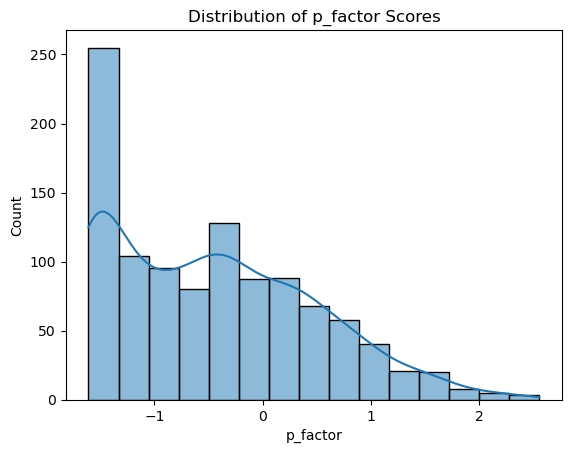

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_vars['p_factor'], kde=True)
plt.title("Distribution of p_factor Scores") ##negatively skewed, doesn't matter for ElasticNet?

### Univariate Relationships: Features vs. p_factor

In [15]:
train_vars['sex'] = train_vars['sex'].map({'Female': 0, 'Male': 1})

/tmp/ipykernel_75/829337432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_vars['sex'] = train_vars['sex'].map({'Female': 0, 'Male': 1})


<Axes: >

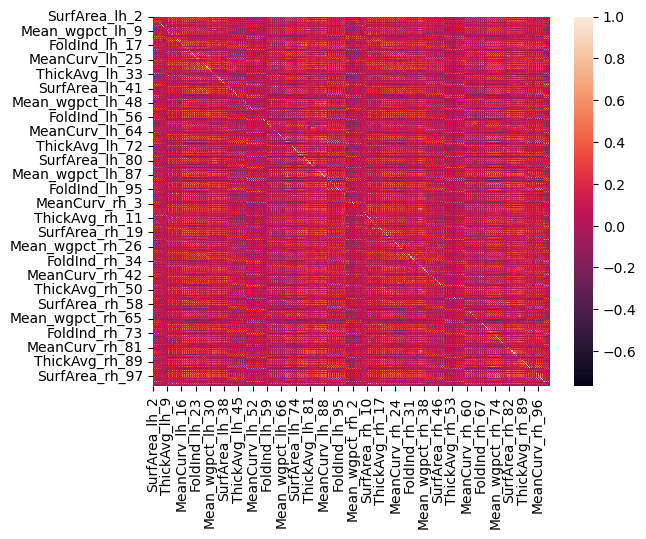

In [16]:
train_vars_numeric = train_vars.drop(columns=['subject_id'])
sns.heatmap(train_vars_numeric.corr())

In [18]:
train_vars_numeric = train_vars.drop(columns=['subject_id'])
# Step 2: Compute correlations with p_factor
correlations = train_vars_numeric.corr()['p_factor'].drop('p_factor')  # remove self-correlation
# Step 3: Sort by absolute correlation
top_correlated = correlations.abs().sort_values(ascending=False)
# Step 4: Show top N
print("Top correlated features with p_factor:")
print(top_correlated.head(10)) 

Top correlated features with p_factor:
age                   0.221855
ThickAvg_lh_99        0.194948
Mean_piallgi_rh_26    0.194804
GrayVol_lh_87         0.192949
Mean_piallgi_lh_52    0.188774
Mean_piallgi_rh_25    0.185185
GrayVol_lh_90         0.184861
ThickStd_lh_11        0.184722
ThickAvg_rh_100       0.184015
Mean_piallgi_lh_94    0.183541
Name: p_factor, dtype: float64


In [159]:
train_vars = data_train_test_200_saved[~np.isnan(data_train_test_200_saved['p_factor'])]
test_vars = data_train_test_200_saved[np.isnan(data_train_test_200_saved['p_factor'])]
# train_vars.to_csv(f'results/train_vars_200.tsv', sep='\t', index=False) 
# test_vars.to_csv(f'results/test_vars_200.tsv', sep='\t', index=False) 

In [160]:
train_vars.shape

(1060, 2005)

### Use ElasticNet to train a model on train_vars

In [161]:
## check nans for the data
nan_freq = train_vars.isna().mean()  # This gives proportion (0 to 1) of NaNs per column
nan_freq_sorted = nan_freq[nan_freq > 0].sort_values(ascending=False)
nan_freq_sorted

bmi                   0.320755
Mean_piallgi_rh_28    0.012264
Mean_piallgi_rh_29    0.012264
Mean_piallgi_rh_30    0.012264
Mean_piallgi_rh_31    0.012264
                        ...   
Mean_piallgi_lh_73    0.012264
Mean_piallgi_lh_74    0.012264
Mean_piallgi_lh_75    0.012264
Mean_piallgi_lh_76    0.012264
Mean_piallgi_lh_64    0.012264
Length: 201, dtype: float64

In [162]:
train_vars_cleaned = train_vars.drop(columns=['bmi','sex']) 
train_vars_cleaned = train_vars_cleaned.dropna(axis=0)
train_vars_cleaned.shape

(1047, 2003)

In [163]:
X = train_vars_cleaned.drop(columns=['subject_id', 'p_factor'])
y= train_vars_cleaned[['p_factor']]

In [164]:
X.shape

(1047, 2001)

In [165]:
## l1_l2 ratio l1_ratio=[0.1, 0.5, 0.9]

from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Now this is defined correctly

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 3: Train ElasticNetCV
model = ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.9], random_state=42)
model.fit(X_train, y_train)
## Cross-validation:	ElasticNetCV does this for you (default is 5-fold)

# Step 4: Evaluate
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Step 5: Get selected features (non-zero coefficients)
import numpy as np
selected_features = np.where(model.coef_ != 0)[0]
print(f"{len(selected_features)} features selected out of {X.shape[1]}")

print("Best l1_ratio:", model.l1_ratio_)
print("Best alpha:", model.alpha_)


/srv/conda/envs/notebook/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/envs/notebook/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.479e-01, tolerance: 5.609e-02
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.067e-01, tolerance: 5.609e-02
  model = cd_fast.enet_c

R²: 0.06292577618647721
MSE: 0.8534834498269561
114 features selected out of 2001
Best l1_ratio: 0.1
Best alpha: 0.4746465619507921


In [ ]:
## l1_l2 ratio l1_ratio=[0.1, 0.5, 0.9]
## increase the iteration time

from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Now this is defined correctly

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 3: Train ElasticNetCV
model = ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.9], random_state=42, max_iter=5000)
model.fit(X_train, y_train)
## Cross-validation:	ElasticNetCV does this for you (default is 5-fold)

# Step 4: Evaluate
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Step 5: Get selected features (non-zero coefficients)
import numpy as np
selected_features = np.where(model.coef_ != 0)[0]
print(f"{len(selected_features)} features selected out of {X.shape[1]}")

print("Best l1_ratio:", model.l1_ratio_)
print("Best alpha:", model.alpha_)


In [147]:

X_scaled = scaler.fit_transform(X)  # Now this is defined correctly
sex_encoded = train_vars_cleaned['sex'].map({'Female': 0, 'Male': 1}).values.reshape(-1, 1)
X_scaled = np.hstack([X_scaled, sex_encoded])


In [149]:
# Step 4: Concatenate numerical + sex
X_scaled = np.hstack([X_scaled, sex_encoded])

In [ ]:
## R²: 0.06292577618647721
## MSE: 0.8534834498269561
## 114 features selected out of 2001
## Best l1_ratio: 0.1
## Best alpha: 0.4746465619507921

### Plot and Table of Predictor Weights

In [69]:
# Prepare data: non-zero coefficients
coef_series = pd.Series(model.coef_, index=X.columns)
coef_series = coef_series[coef_series != 0]
coef_series = coef_series.sort_values(key=abs, ascending=False)

# Convert to DataFrame for Seaborn
coef_df = coef_series.reset_index()
coef_df.columns = ['Feature', 'Weight']
coef_df

,Feature,Weight
0,Mean_wgpct_lh_6,0.035293
1,ThickAvg_rh_97,-0.032794
2,ThickStd_lh_11,-0.029905
3,MeanCurv_lh_13,-0.026911
4,ThickStd_rh_54,0.025740
...,...,...
109,ThickAvg_lh_36,-0.000406
110,ThickAvg_lh_48,0.000334
111,Mean_wgpct_rh_50,0.000215
112,Mean_piallgi_rh_29,-0.000157


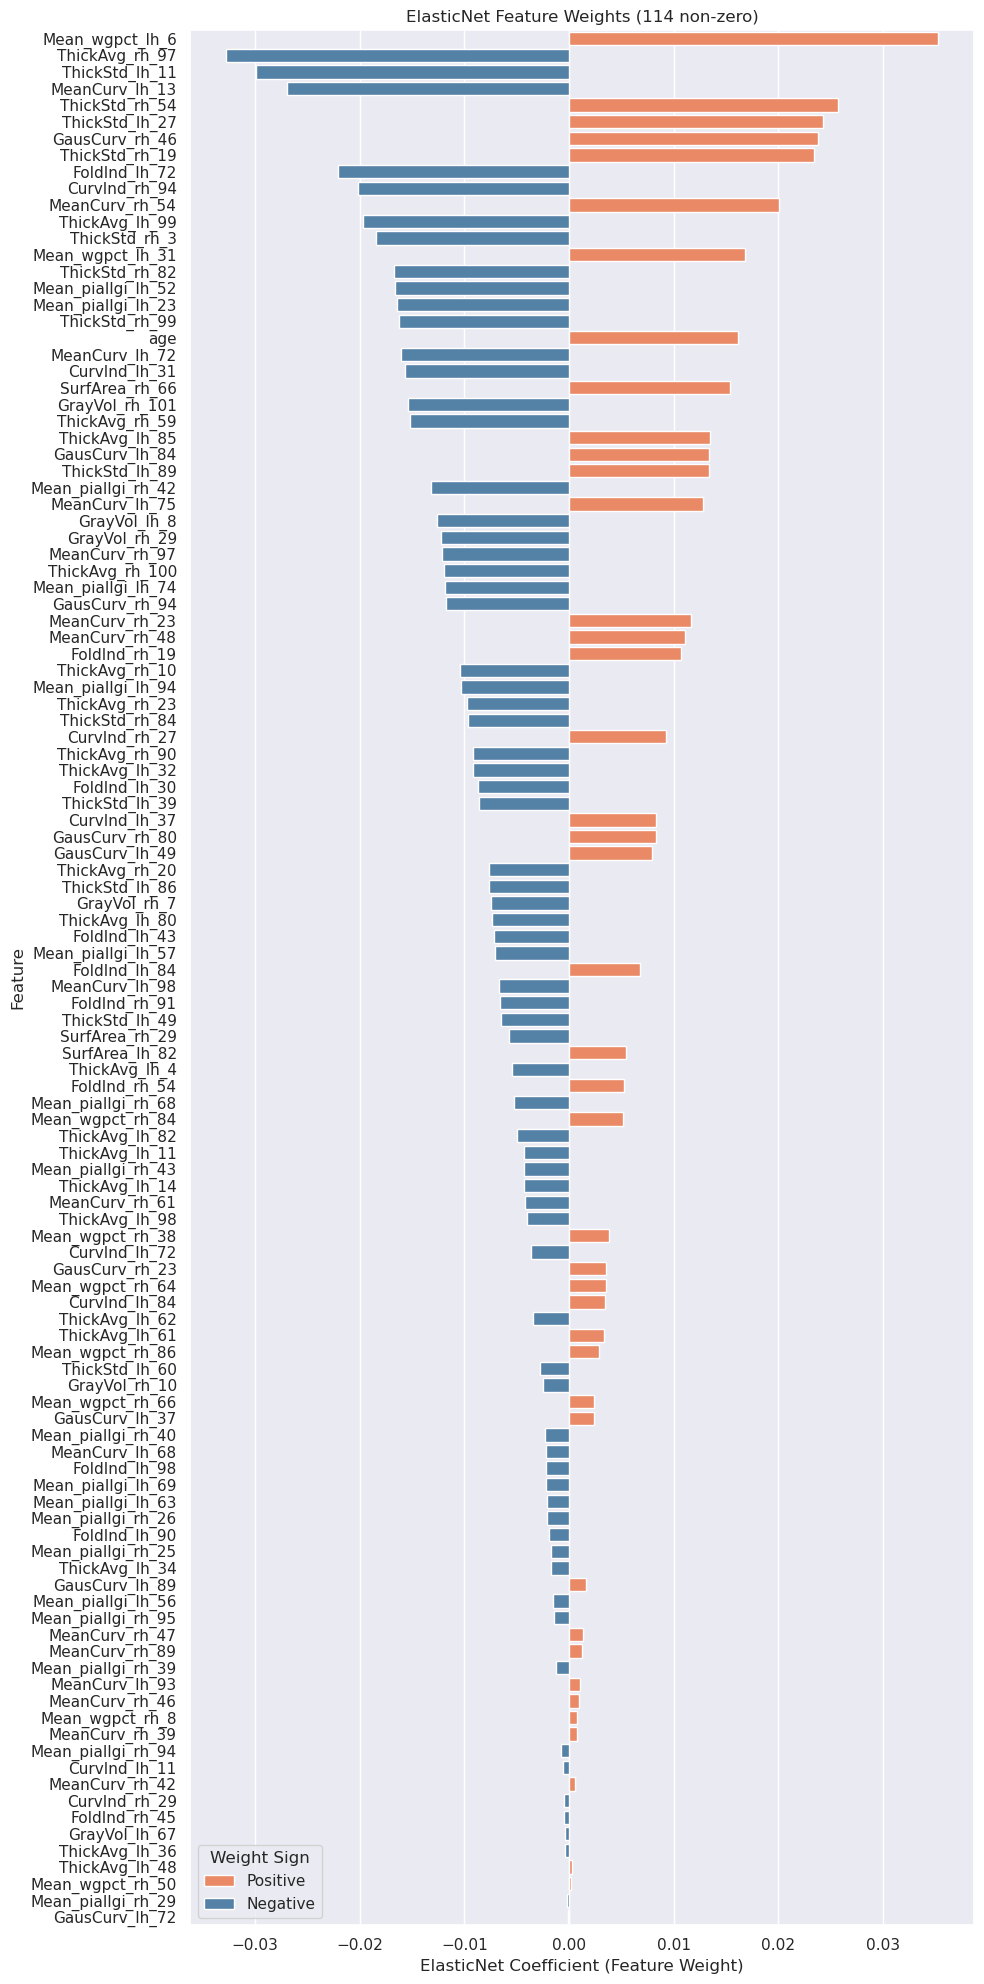

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
# Prepare data
coef_series = pd.Series(model.coef_, index=X.columns)
coef_series = coef_series[coef_series != 0]
coef_series = coef_series.sort_values(key=abs, ascending=False)

# Convert to DataFrame
coef_df = coef_series.reset_index()
coef_df.columns = ['Feature', 'Weight']
coef_df['Sign'] = coef_df['Weight'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
palette = {'Positive': 'coral', 'Negative': 'steelblue'}

# Set Seaborn style
sns.set(style="darkgrid")  # Try also: "darkgrid", "white", "ticks"

# Plot
plt.figure(figsize=(10, min(0.25 * len(coef_df), 20)))
sns.barplot(
    data=coef_df, 
    x='Weight', 
    y='Feature', 
    hue='Sign',        # Color by sign
    dodge=False,       # Prevent bars from stacking side-by-side # Nice diverging color palette
    palette = palette
)

plt.xlabel("ElasticNet Coefficient (Feature Weight)")
plt.ylabel("Feature")
plt.title(f"ElasticNet Feature Weights ({len(coef_df)} non-zero)")
plt.legend(title='Weight Sign')
plt.tight_layout()
plt.show()

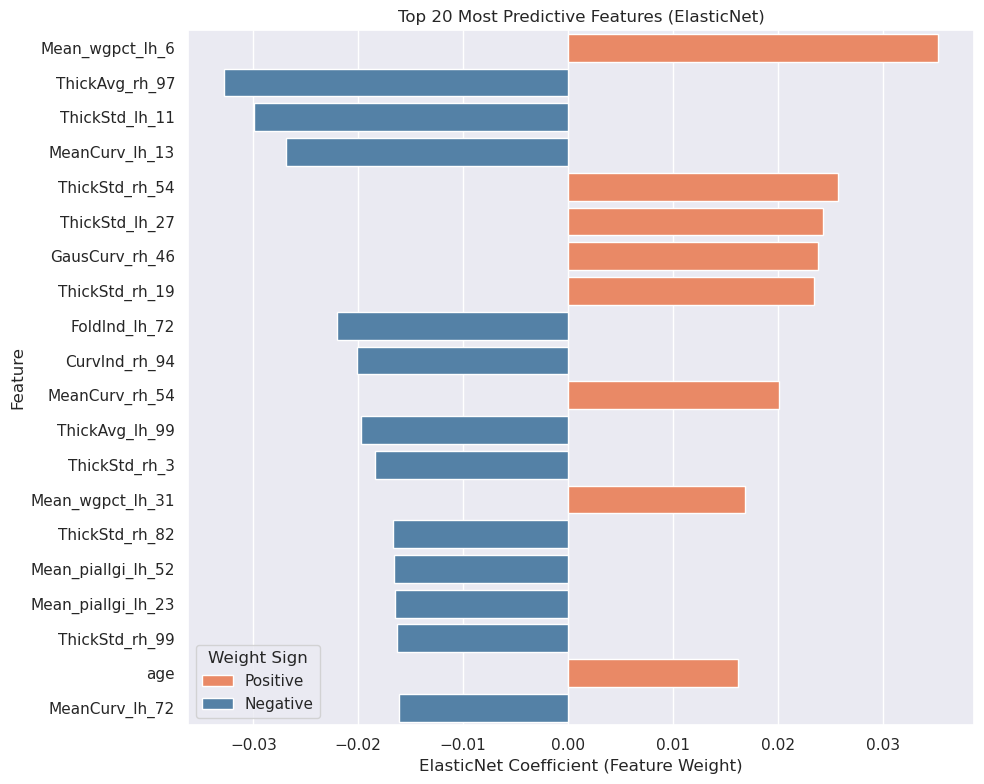

In [84]:
# Prepare data
coef_series = pd.Series(model.coef_, index=X.columns)
coef_series = coef_series[coef_series != 0]
coef_series = coef_series.sort_values(key=abs, ascending=False)

# Keep only top 20 features
coef_df = coef_series.head(20).reset_index()
coef_df.columns = ['Feature', 'Weight']
coef_df['Sign'] = coef_df['Weight'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Seaborn style
sns.set(style="darkgrid")
# Plot
plt.figure(figsize=(10, 8))
sns.barplot(
    data=coef_df,
    x='Weight',
    y='Feature',
    hue='Sign',
    dodge=False,
    palette=palette
)

plt.xlabel("ElasticNet Coefficient (Feature Weight)")
plt.ylabel("Feature")
plt.title("Top 20 Most Predictive Features (ElasticNet)")
plt.legend(title='Weight Sign')
plt.tight_layout()
plt.show()

## correlation between real p_factors and predicted p_factors

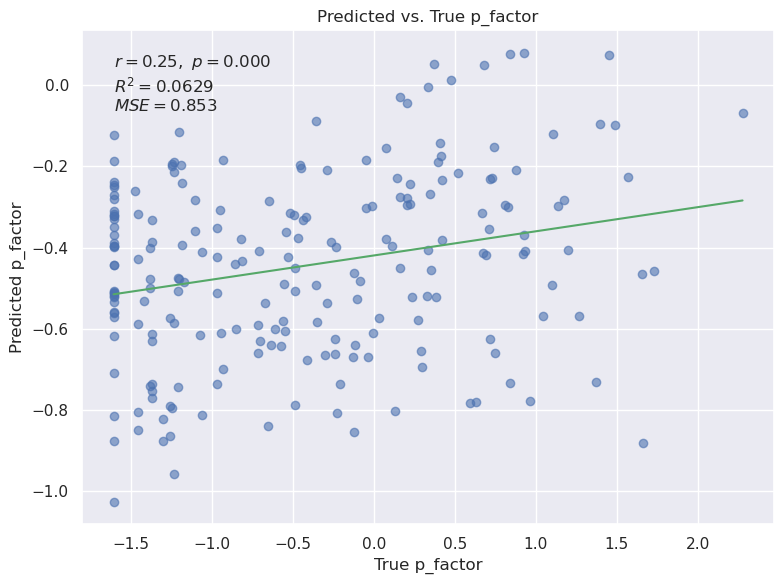

In [109]:
from scipy.stats import pearsonr

# Flatten to 1D arrays (just in case)
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.values.ravel()

# Compute Pearson correlation
r, p = pearsonr(y_test_flat, y_pred_flat)
r2 = 0.0629
mse = 0.853

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_test_flat, y_pred_flat, alpha=0.6)
plt.xlabel("True p_factor")
plt.ylabel("Predicted p_factor")
plt.title("Predicted vs. True p_factor")

plt.text(
    x=min(y_test_flat),
    y=max(y_pred_flat),
    s=(
        f"$r = {r:.2f},\ p = {p:.3f}$\n"
        f"$R^2 = {r2:.4f}$\n"
        f"$MSE = {mse:.3f}$"
    ),
    fontsize=12,
    verticalalignment='top'
)

# Fit linear regression to points
slope, intercept = np.polyfit(y_test_flat, y_pred_flat, 1)
x_vals = np.linspace(min(y_test_flat), max(y_test_flat), 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, 'g-', label='Regression Line')
plt.tight_layout()
plt.show()

In [166]:
test_vars['sex'] = test_vars['sex'].map({'Female': 0, 'Male': 1})

/tmp/ipykernel_553/2673200841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_vars['sex'] = test_vars['sex'].map({'Female': 0, 'Male': 1})


In [167]:

nan_freq_test = test_vars.isna().mean()  # This gives proportion (0 to 1) of NaNs per column
nan_freq_sorted_test = nan_freq_test[nan_freq_test > 0].sort_values(ascending=False)
nan_freq_sorted_test

p_factor              1.000000
bmi                   0.270677
Mean_piallgi_rh_29    0.007519
Mean_piallgi_rh_30    0.007519
Mean_piallgi_rh_31    0.007519
                        ...   
Mean_piallgi_lh_74    0.007519
Mean_piallgi_lh_75    0.007519
Mean_piallgi_lh_76    0.007519
Mean_piallgi_lh_77    0.007519
Mean_piallgi_lh_65    0.007519
Length: 202, dtype: float64

In [168]:
test_vars_cleaned = test_vars.drop(columns=['bmi','sex'])  ## proportion is too high

In [169]:
nan_freq_test = test_vars_cleaned.isna().mean()  # This gives proportion (0 to 1) of NaNs per column
nan_freq_sorted_test = nan_freq_test[nan_freq_test > 0].sort_values(ascending=False)
nan_freq_sorted_test

p_factor              1.000000
Mean_piallgi_rh_28    0.007519
Mean_piallgi_rh_29    0.007519
Mean_piallgi_rh_30    0.007519
Mean_piallgi_rh_31    0.007519
                        ...   
Mean_piallgi_lh_73    0.007519
Mean_piallgi_lh_74    0.007519
Mean_piallgi_lh_75    0.007519
Mean_piallgi_lh_76    0.007519
Mean_piallgi_lh_64    0.007519
Length: 201, dtype: float64

In [79]:
print(test_vars_cleaned.isna().sum().sort_values(ascending=False)) 

p_factor              532
Mean_piallgi_rh_29      4
Mean_piallgi_rh_74      4
Mean_piallgi_lh_31      4
Mean_piallgi_lh_82      4
                     ... 
GausCurv_lh_71          0
MeanCurv_lh_71          0
ThickStd_lh_71          0
ThickAvg_lh_71          0
CurvInd_lh_72           0
Length: 2004, dtype: int64


In [170]:
X_test = test_vars_cleaned.drop(columns=['subject_id', 'p_factor'])
X_test_filled = X_test.fillna(X_test.mean())

In [171]:
X_test_filled ## filed nan with column mean since it only has 4 nans in each column; we can delete it as well.

,SurfArea_lh_2,GrayVol_lh_2,ThickAvg_lh_2,ThickStd_lh_2,MeanCurv_lh_2,GausCurv_lh_2,FoldInd_lh_2,CurvInd_lh_2,Mean_wgpct_lh_2,Mean_piallgi_lh_2,...,GrayVol_rh_101,ThickAvg_rh_101,ThickStd_rh_101,MeanCurv_rh_101,GausCurv_rh_101,FoldInd_rh_101,CurvInd_rh_101,Mean_wgpct_rh_101,Mean_piallgi_rh_101,age
1060,857,2281,2.472,0.533,0.125,0.024,18,1.1,20.1767,2.816300,...,2107,2.741,0.476,0.143,0.034,15,1.3,21.5335,3.092400,14.916667
1061,758,2115,2.668,0.490,0.113,0.021,13,1.0,22.0290,2.964600,...,2446,2.935,0.666,0.156,0.047,23,1.9,19.4762,3.160900,8.250000
1062,694,1731,2.432,0.424,0.135,0.025,16,1.1,19.9330,2.567700,...,1795,2.624,0.597,0.149,0.031,16,1.1,21.7938,2.739300,21.500000
1063,599,1603,2.417,0.496,0.149,0.053,14,1.9,14.7382,2.710100,...,2541,3.020,0.811,0.149,0.053,18,2.2,17.8776,3.106400,8.750000
1064,804,2046,2.617,0.501,0.119,0.020,17,1.0,20.3597,2.821400,...,2206,2.733,0.458,0.120,0.026,14,1.3,21.3854,3.124400,18.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,922,2573,2.612,0.469,0.110,0.019,15,0.9,21.4848,3.061500,...,2101,2.520,0.477,0.121,0.027,13,1.1,22.6886,3.070500,12.333333
1588,806,2108,2.512,0.575,0.117,0.031,17,1.4,18.2542,2.831738,...,1789,2.718,0.806,0.155,0.040,15,1.2,20.9895,3.016766,18.166667
1589,920,2090,2.243,0.579,0.115,0.025,15,1.2,19.7019,3.099900,...,2085,2.437,0.557,0.123,0.030,11,1.5,22.2611,3.518900,11.000000
1590,714,2007,2.655,0.514,0.125,0.034,17,1.2,20.5598,2.694300,...,1793,2.629,0.636,0.142,0.041,13,1.3,22.1398,3.130300,13.416667


In [172]:
X_test_scaled = scaler.transform(X_test_filled)  
y_test_pred = model.predict(X_test_scaled)
test_vars['p_factor'] = y_test_pred

/tmp/ipykernel_553/2111283441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_vars['p_factor'] = y_test_pred


Text(0.5, 1.0, 'Distribution of p_factor Scores (test)')

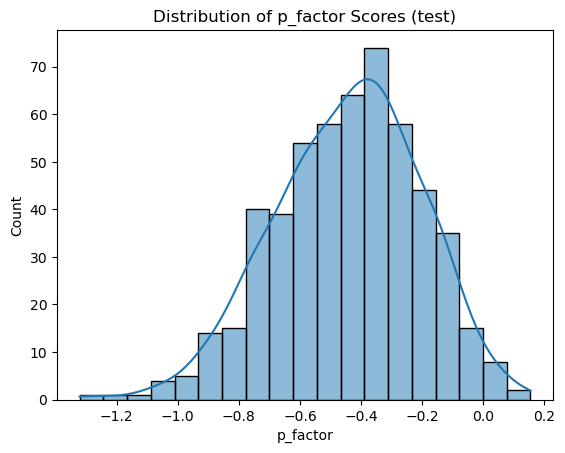

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(test_vars['p_factor'], kde=True)
plt.title("Distribution of p_factor Scores (test)") ##negatively skewed, doesn't matter for ElasticNet?

In [82]:
test_vars

,subject_id,SurfArea_lh_2,GrayVol_lh_2,ThickAvg_lh_2,ThickStd_lh_2,MeanCurv_lh_2,GausCurv_lh_2,FoldInd_lh_2,CurvInd_lh_2,Mean_wgpct_lh_2,...,MeanCurv_rh_101,GausCurv_rh_101,FoldInd_rh_101,CurvInd_rh_101,Mean_wgpct_rh_101,Mean_piallgi_rh_101,p_factor,age,sex,bmi
1060,sub-1000881804,857,2281,2.472,0.533,0.125,0.024,18,1.1,20.1767,...,0.143,0.034,15,1.3,21.5335,3.0924,-0.257559,14.916667,1,21.52
1061,sub-100527940,758,2115,2.668,0.490,0.113,0.021,13,1.0,22.0290,...,0.156,0.047,23,1.9,19.4762,3.1609,-0.629498,8.250000,1,NaN
1062,sub-1006151876,694,1731,2.432,0.424,0.135,0.025,16,1.1,19.9330,...,0.149,0.031,16,1.1,21.7938,2.7393,-0.042633,21.500000,0,NaN
1063,sub-1012530688,599,1603,2.417,0.496,0.149,0.053,14,1.9,14.7382,...,0.149,0.053,18,2.2,17.8776,3.1064,-0.733271,8.750000,1,21.36
1064,sub-1030193285,804,2046,2.617,0.501,0.119,0.020,17,1.0,20.3597,...,0.120,0.026,14,1.3,21.3854,3.1244,-0.660848,18.000000,1,22.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,sub-969649154,922,2573,2.612,0.469,0.110,0.019,15,0.9,21.4848,...,0.121,0.027,13,1.1,22.6886,3.0705,-0.469869,12.333333,1,17.38
1588,sub-970890500,806,2108,2.512,0.575,0.117,0.031,17,1.4,18.2542,...,0.155,0.040,15,1.2,20.9895,NaN,-0.419145,18.166667,0,30.89
1589,sub-975856179,920,2090,2.243,0.579,0.115,0.025,15,1.2,19.7019,...,0.123,0.030,11,1.5,22.2611,3.5189,-0.865999,11.000000,1,15.67
1590,sub-984757368,714,2007,2.655,0.514,0.125,0.034,17,1.2,20.5598,...,0.142,0.041,13,1.3,22.1398,3.1303,-0.377402,13.416667,1,16.66


In [83]:
test_vars['subject_id'] = test_vars['subject_id'].str.replace('sub-', '').astype(int)
test_vars
test_data['p_factor'] = test_data['participant_id'].map(test_vars.set_index('subject_id')['p_factor'])

/tmp/ipykernel_553/3590130989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_vars['subject_id'] = test_vars['subject_id'].str.replace('sub-', '').astype(int)


In [86]:
test_data.to_csv(f'results/test_vars_200_predicted.tsv', sep='\t', index=False) 

In [85]:
test_data.head()

,participant_id,study,study_site,session_id,wave,age,sex,race,ethnicity,bmi,handedness,participant_education,parent_1_education,parent_2_education,p_factor,internalizing_mcelroy_harmonized_all_samples,externalizing_mcelroy_harmonized_all_samples,attention_mcelroy_harmonized_all_samples,cubids_acquisition_group
0,1000881804,PNC,PNC1,PNC1,1,14.916667,Male,Black,not Hispanic or Latino,21.52,Right,7th Grade,Complete secondary,Complete secondary,-0.257559,0.097355,0.387355,-0.467807,113
1,100527940,PNC,PNC1,PNC1,1,8.250000,Male,Black,not Hispanic or Latino,NaN,Ambidextrous,1st Grade,Complete secondary,Complete primary,-0.629498,0.699062,-0.781881,-0.982040,3
2,1006151876,PNC,PNC1,PNC1,1,21.500000,Female,Other,not Hispanic or Latino,NaN,Right,12th Grade,Complete tertiary,Complete secondary,-0.042633,0.495947,0.806481,-0.832210,1
3,1012530688,PNC,PNC1,PNC1,1,8.750000,Male,Black,not Hispanic or Latino,21.36,Right,2nd Grade,Complete tertiary,Complete secondary,-0.733271,-0.334835,1.277773,0.161110,4
4,1030193285,PNC,PNC1,PNC1,1,18.000000,Male,White,not Hispanic or Latino,22.15,Right,10th Grade,Complete secondary,Complete primary,-0.660848,1.027404,-0.490472,2.014568,1


## Test other methods

### Use PCA to to reduce dimensionality and then train your ElasticNet model on components

In [59]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# pipeline: Scale → PCA → ElasticNet
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50)),  
    ('enet', ElasticNetCV(cv=5, random_state=42))
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("R²:", r2_score(y_test, y_pred))

R²: 0.052152927339408794


/srv/conda/envs/notebook/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Feature selection

In [25]:
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
# Compute absolute correlation with y
correlations = X.corrwith(y).abs()
top_features = correlations.sort_values(ascending=False).head(200).index

# Filter X to those features
X_selected = X[top_features]

# Step 1: Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 3: Train ElasticNetCV
model = ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.9], random_state=42)
model.fit(X_train, y_train)
## Cross-validation:	ElasticNetCV does this for you (default is 5-fold)

# Step 4: Evaluate
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Step 5: Get selected features (non-zero coefficients)
import numpy as np
selected_features = np.where(model.coef_ != 0)[0]
print(f"{len(selected_features)} features selected out of {len(top_features)}")

/srv/conda/envs/notebook/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R²: 0.038448227676077806
MSE: 0.8757775029713735
30 features selected out of 200


## PCA + regression showed a better model fit

In [50]:
y_new_pred = pipeline.predict(X_test_filled)

test_vars['p_factor'] = y_new_pred

/tmp/ipykernel_553/43451698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_vars['p_factor'] = y_new_pred


In [55]:
test_vars['subject_id'] = test_vars['subject_id'].str.replace('sub-', '').astype(int)
test_vars

/tmp/ipykernel_553/1166233001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_vars['subject_id'] = test_vars['subject_id'].str.replace('sub-', '').astype(int)


,subject_id,SurfArea_lh_2,GrayVol_lh_2,ThickAvg_lh_2,ThickStd_lh_2,MeanCurv_lh_2,GausCurv_lh_2,FoldInd_lh_2,CurvInd_lh_2,Mean_wgpct_lh_2,...,MeanCurv_rh_101,GausCurv_rh_101,FoldInd_rh_101,CurvInd_rh_101,Mean_wgpct_rh_101,Mean_piallgi_rh_101,p_factor,age,sex,bmi
1060,1000881804,857,2281,2.472,0.533,0.125,0.024,18,1.1,20.1767,...,0.143,0.034,15,1.3,21.5335,3.0924,-0.454687,14.916667,1,21.52
1061,100527940,758,2115,2.668,0.490,0.113,0.021,13,1.0,22.0290,...,0.156,0.047,23,1.9,19.4762,3.1609,-0.759874,8.250000,1,NaN
1062,1006151876,694,1731,2.432,0.424,0.135,0.025,16,1.1,19.9330,...,0.149,0.031,16,1.1,21.7938,2.7393,0.001268,21.500000,0,NaN
1063,1012530688,599,1603,2.417,0.496,0.149,0.053,14,1.9,14.7382,...,0.149,0.053,18,2.2,17.8776,3.1064,-0.641507,8.750000,1,21.36
1064,1030193285,804,2046,2.617,0.501,0.119,0.020,17,1.0,20.3597,...,0.120,0.026,14,1.3,21.3854,3.1244,-0.439935,18.000000,1,22.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,969649154,922,2573,2.612,0.469,0.110,0.019,15,0.9,21.4848,...,0.121,0.027,13,1.1,22.6886,3.0705,-0.571710,12.333333,1,17.38
1588,970890500,806,2108,2.512,0.575,0.117,0.031,17,1.4,18.2542,...,0.155,0.040,15,1.2,20.9895,NaN,-0.417503,18.166667,0,30.89
1589,975856179,920,2090,2.243,0.579,0.115,0.025,15,1.2,19.7019,...,0.123,0.030,11,1.5,22.2611,3.5189,-0.985778,11.000000,1,15.67
1590,984757368,714,2007,2.655,0.514,0.125,0.034,17,1.2,20.5598,...,0.142,0.041,13,1.3,22.1398,3.1303,-0.363818,13.416667,1,16.66


In [56]:
test_data['p_factor'] = test_data['participant_id'].map(test_vars.set_index('subject_id')['p_factor'])

In [58]:
test_data
test_data.to_csv(f'results/test_vars_200_predicted_PCA50.tsv', sep='\t', index=False) 